In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image
from PIL import ImageDraw
plt.style.use({'figure.figsize':(5, 5)})

In [48]:
Velocity_tripod=0.289*40
Up_D=np.array([-40,-20,0,20,40])
Left_D=np.array([-60,-80,-100,-120])
Right_D=np.array([60,80,100,120])
Robot_radium=40

In [49]:
Q_table1_state=np.array(['L0R0U0','L0R0U1','L0R0U2','L0R0U3',
                'L0R1U0','L0R1U1','L0R1U2','L0R1U3',
                'L0R2U0','L0R2U1','L0R2U2','L0R2U3',
                'L0R3U0','L0R3U1','L0R3U2','L0R3U3',
                'L1R0U0','L1R0U1','L1R0U2','L1R0U3',
                'L1R1U0','L1R1U1','L1R1U2','L1R1U3',
                'L1R2U0','L1R2U1','L1R2U2','L1R2U3',
                'L1R3U0','L1R3U1','L1R3U2','L1R3U3',
                'L2R0U0','L2R0U1','L2R0U2','L2R0U3',
                'L2R1U0','L2R1U1','L2R1U2','L2R1U3',
                'L2R2U0','L2R2U1','L2R2U2','L2R2U3',
                'L2R3U0','L2R3U1','L2R3U2','L2R3U3',
                'L3R0U0','L3R0U1','L3R0U2','L3R0U3',
                'L3R1U0','L3R1U1','L3R1U2','L3R1U3',
                'L3R2U0','L3R2U1','L3R2U2','L3R2U3',
                'L3R3U0','L3R3U1','L3R3U2','L3R3U3'])
Q_table2_state=np.array(['L60D0/30','L180D0/30','L250D0/30','L300D0/30',
                'L60D30/60','L180D30/60','L250D30/60','L300D30/60',
                 'L60D60/90','L180D60/90','L250D60/90','L300D60/90',
                'L60D90/120','L180D90/120','L250D90/120','L300D90/120',
                'L60D120/150','L180D120/150','L250D120/150','L300D120/150',
                'L60D150/180','L180D150/180','L250D150/180','L300D150/180',
                'L60D180/210','L180D180/210','L250D180/210','L300D180/210',
                'L60D210/240','L180D210/240','L250D210/240','L300D210/240',
                'L60D240/270','L180D240/270','L250D240/270','L300D240/270',
                'L60D270/300','L180D270/300','L250D270/300','L300D270/300',
                'L60D300/330','L180D300/330','L250D300/330','L300D300/330',
                 'L60D330/360','L180D330/360','L250D330/360','L300D330/360'])
Q_table1_action=np.array(['Up','Left_45D','Right_45D'])

In [50]:
Q_Table1_avoid=np.loadtxt(r"E:\Graduate\python\Q_Table_notgait_finish\Q_Table1_notgait\Q_Table1_notgait_1.txt")
Q_Table2_arrive=np.loadtxt(r"E:\Graduate\python\Q_Table_notgait_finish\Q_Table2_notgait\Q_Table2_notgait_1.txt")
print(Q_Table1_avoid[:10])
print("****************")
print(Q_Table2_arrive[:10])

[[-24.62277603  17.06473579  16.55107006  17.0196781 ]
 [ 19.05728693  17.63935626  17.00640946  17.1668592 ]
 [ 19.66578675  17.54354477  14.73099071  14.86500902]
 [ 19.91171264 -15.50714525  17.70065142  17.92763426]
 [-85.86446013  17.04326148  16.95608749  17.28361326]
 [ 18.41481904  17.97435491  17.52976874  18.18513114]
 [ 19.63650141  18.57422041  17.25156554  17.86311027]
 [ 19.91715517  18.91568998  18.03467623  18.4483734 ]
 [ 14.80059619  17.51862888  17.01658842  18.49721911]
 [ 19.37708817  18.49523286  17.59429091  18.69833424]]
****************
[[ 285.13710986  250.13541598  216.81415767]
 [  -5.           -5.21129576   -6.93722021]
 [ -10.          -10.11279885  -12.07253466]
 [ -15.          -15.57454709  -16.13086534]
 [ 260.44855442  283.77723211  208.19530717]
 [  -6.           -5.           -7.87605593]
 [ -11.          -10.          -13.72519212]
 [ -16.          -15.          -19.17560281]
 [ 212.7447237   247.32687124  176.98650425]
 [  -7.28902254   -5.705890

In [51]:
def Draw_map1(Destination_x,Destination_y):
    im=Image.new('RGB',size=(2000,2000),color=(0,0,0))
    draw=ImageDraw.Draw(im,mode='RGB')
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255)) 
    draw.rectangle((1500,1000,1650,1150),(0,0,0), (0,0,0)) 
    draw.ellipse((400,700,550,850),(0,0,0), (0,0,0)) 
    draw.rectangle((200,300,350,450),(0,0,0), (0,0,0)) 
    draw.ellipse((1500,500,1550,650),(0,0,0), (0,0,0)) 
    draw.ellipse((1200,1400,1350,1550),(0,0,0), (0,0,0)) 
    draw.rectangle((700,1200,850,1350),(0,0,0), (0,0,0)) 
    draw.ellipse((300,1600,450,1750),(0,0,0), (0,0,0)) 
    draw.rectangle((100,1100,250,1250),(0,0,0),(0,0,0)) 
    draw.ellipse((1100,250,1250,400),(0,0,0),(0,0,0)) 
    draw.polygon((900, 1070,1120, 1000,1150, 1100, 1100,1090,1050, 1200),(0,0,0),(0,0,0))
    draw.pieslice((750, 1700, 900, 1850), 0,180,(0,0,0),(0,0,0))
    draw.ellipse((900,550,1050,700),(0,0,0),(0,0,0))
    draw.ellipse((650,100,750,200),(0,0,0),(0,0,0)) 
    draw.rectangle((1700,130,1800,230),(0,0,0),(0,0,0))
#     draw.polygon((150, 180, 200, 180, 250, 120, 230, 90, 130, 100),(0,0,0),(0,0,0))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20),(218,112,214),(218,112,214))
    return im
# im=Draw_map1()
# plt.imshow(im)
# plt.show()

In [52]:
def Draw_map2(Destination_x,Destination_y):
    im=Image.new('RGB',size=(2000,2000),color=(0,0,0))
    draw=ImageDraw.Draw(im,mode='RGB')
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255)) 
    draw.rectangle((1000,300,1100,1700),(0,0,0),(0,0,0))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20),(218,112,214),(218,112,214))
    return im
#im=Draw_map2(1750,250)
#plt.imshow(im)
#plt.show()

In [53]:
def Set_destination(x,y):
    return x,y

def Start_point(x,y,angle):
    return x,y,angle

In [54]:
def Scan_1(Current_x,Current_y,Angle,im):
    Distance_level=0
    Obstacle_distance=Robot_radium
    Obstacle_distance_x=Current_x+Obstacle_distance*np.cos(Angle/180*np.pi)
    Obstacle_distance_y=Current_y+Obstacle_distance*np.sin(Angle/180*np.pi)
    while(im.getpixel((Obstacle_distance_x,Obstacle_distance_y))!=(0,0,0) and Obstacle_distance<250):#getpixiel obtains the degree of Gray Scale
        Obstacle_distance+=5  #Search interval, can be changed
        Obstacle_distance_x=Current_x+Obstacle_distance*np.cos(Angle/180*np.pi)
        Obstacle_distance_y=Current_y+Obstacle_distance*np.sin(Angle/180*np.pi)
    test_value=np.random.random()*12
    if 0<=Obstacle_distance<test_value+90:
        Distance_level=0 #Nearear
    elif test_value+90<=Obstacle_distance<170:
        Distance_level=1 #Near
    elif 170<=Obstacle_distance<250:
        Distance_level=2 #Medium
    else:
        Distance_level=3 #Far
    return Distance_level,Obstacle_distance
def Direction_min_level_1(Degree,Current_x,Current_y,Current_angle,im):
    Level=[]
    Distance=[]
    Degree=Degree+Current_angle
    for i in Degree:
        Level.append((Scan_1(Current_x,Current_y,i,im))[0])
        Distance.append((Scan_1(Current_x,Current_y,i,im))[1])
    return min(Level),min(Distance)
def Output_state_index_1(Left_min_level,Right_min_level,Up_min_level):
    LRU=[]
    LRU.append(Left_min_level)
    LRU.append(Right_min_level)
    LRU.append(Up_min_level)
    return LRU[0]*16+LRU[1]*4+LRU[2]

In [55]:
def Robot_destination_2(Destination_x,Destination_y,Current_x,Current_y,Current_angle):
    #Left-negative,180-360 |||| Right-positive,0-180
    Delta_x=Destination_x-Current_x
    Delta_y=Destination_y-Current_y
    Distance=np.sqrt(Delta_x*Delta_x+Delta_y*Delta_y)
    Direct_angle=(np.arctan(Delta_y/Delta_x))*180/np.pi
    if Delta_x<0:
        Direct_angle=Direct_angle+180
    True_angle=(Current_angle-Direct_angle)%360
    if True_angle>180:
        return 360-True_angle,'right',Distance
    else:
        return True_angle,'left',Distance
def Is_arrive_2(Current_x,Current_y,im):
    Arrive=False
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Distance=np.arange(0,40,5)
    for i in Distance:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
            if (im.getpixel((x,y)))==(218,112,214):
                Arrive=True
                break
        if Arrive==True or Crash==True:
                break
    return Arrive
def Output_state_index_2(True_angle,Left_right,Distance):
    if 0<=Distance<60:
        Distance_level=0
    elif 60<=Distance<180:
        Distance_level=1
    elif 180<=Distance<250:
        Distance_level=2
    else:
        Distance_level=3
    
    Angle_level=True_angle//30
    
    if Left_right=='right':
        If_left_right=1
        State_number=int(Distance_level+24*If_left_right+(5-Angle_level)*4)
    elif Left_right=='left':
        If_left_right=0
        Angle_level=True_angle//30
        State_number=int(Distance_level+24*If_left_right+Angle_level*4)
    return State_number,Distance_level,Angle_level

In [56]:
def Is_Crash(Current_x,Current_y,im):
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Distance=np.arange(0,50,5)
    for i in Distance:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
        if Crash==True:
                break
    return Crash

In [57]:
def  Which_table_action(Avoid_action,Arrive_action,Current_x,Current_y,Current_angle,Destination_x,Destination_y,im):
    if Avoid_action==0:
        Next_x_avoid=Current_x+Velocity_tripod*np.cos(Current_angle/180*np.pi)
        Next_y_avoid=Current_y+Velocity_tripod*np.sin(Current_angle/180*np.pi)
        Next_angle_avoid=Current_angle
    elif Avoid_action==1:
        Next_x_avoid=Current_x-Velocity_tripod*np.cos(Current_angle/180*np.pi)
        Next_y_avoid=Current_y-Velocity_tripod*np.sin(Current_angle/180*np.pi)
        Next_angle_avoid=Current_angle
    elif Avoid_action==2:
        Next_x_avoid=Current_x
        Next_y_avoid=Current_y
        Next_angle_avoid=Current_angle-45
    elif Avoid_action==3:
        Next_x_avoid=Current_x
        Next_y_avoid=Current_y
        Next_angle_avoid=Current_angle+45
        
    if Arrive_action==0:
        Next_x_arrive=Current_x+Velocity_tripod*np.cos(Current_angle/180*np.pi)
        Next_y_arrive=Current_y+Velocity_tripod*np.sin(Current_angle/180*np.pi)
        Next_angle_arrive=Current_angle
    elif Arrive_action==1:
        Next_x_arrive=Current_x
        Next_y_arrive=Current_y
        Next_angle_arrive=Current_angle-45
    elif Arrive_action==2:
        Next_x_arrive=Current_x
        Next_y_arrive=Current_y
        Next_angle_arrive=Current_angle+45
        
    Next_left_level_1,Next_left_obstacle_distance_1=Direction_min_level_1(Left_D,Next_x_avoid,Next_y_avoid,Next_angle_avoid,im)
    Next_right_level_1,Next_right_obstacle_distance_1=Direction_min_level_1(Right_D,Next_x_avoid,Next_y_avoid,Next_angle_avoid,im)
    Next_up_level_1,Next_up_obstacle_disance_1=Direction_min_level_1(Up_D,Next_x_avoid,Next_y_avoid,Next_angle_avoid,im)
    Next_min_level_1=min(Next_left_level_1,Next_right_level_1,Next_up_level_1)

    if  Next_min_level_1==0:
        Next_x=Next_x_avoid
        Next_y=Next_y_avoid
        Next_angle=Next_angle_avoid
        Next_action=Avoid_action
        print("start-----------------------------------------")
        print('Current : Avoid %f %f %f'%(Current_x,Current_y,Current_angle%360))
        print('Action=%d'%Next_action)  
        print('Next :Avoid %f %f %f'%(Next_x,Next_y,Next_angle%360))
        print("start-----------------------------------------")
#         print('Min level=%d'%Next_min_level_1)
    else:
        Next_x=Next_x_arrive
        Next_y=Next_y_arrive
        Next_angle=Next_angle_arrive
        Next_action=Arrive_action
        print("start-----------------------------------------")
        print('Current : Arrive %f %f %f'%(Current_x,Current_y,Current_angle%360))
        print('Action=%d'%Next_action)  
        print('Next :Arrive %f %f %f'%(Next_x,Next_y,Next_angle%360))
        print("stop-----------------------------------------")

    return Next_x,Next_y,Next_angle,Next_action


In [58]:
def Movement_plot(Destination_x,Destination_y,Vec_x,Vec_y):
    k=len(Vec_x)
    im=Image.new("RGB", size=(2000,2000),color=(0,0,0))
    draw = ImageDraw.Draw(im,mode='RGB')
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255))
    draw.rectangle((1500,1000,1650,1150),(0,0,0),(0,0,0)) 
    draw.ellipse((400,700,550,850),(0,0,0),(0,0,0)) 
    draw.rectangle((200,300,350,450),(0,0,0),(0,0,0)) 
    draw.ellipse((1500,500,1550,650),(0,0,0),(0,0,0)) 
    draw.ellipse((1200,1400,1350,1550),(0,0,0),(0,0,0)) 
    draw.rectangle((700,1200,850,1350),(0,0,0),(0,0,0)) 
    draw.ellipse((300,1600,450,1750),(0,0,0),(0,0,0)) 
    draw.rectangle((100,1100,250,1250),(0,0,0),(0,0,0)) 
    draw.ellipse((1100,250,1250,400),(0,0,0),(0,0,0)) 
    draw.polygon((900, 1070,1120, 1000,1150, 1100, 1100,1090,1050, 1200),(0,0,0),(0,0,0))
    draw.pieslice((750, 1700, 900, 1850), 0,180,(0,0,0),(0,0,0))
    draw.ellipse((900,550,1050,700),(0,0,0),(0,0,0))
    draw.ellipse((650,100,750,200),(0,0,0),(0,0,0)) 
    draw.rectangle((1700,130,1800,230),(0,0,0),(0,0,0))
    draw.polygon((150, 180, 200, 180, 250, 120, 230, 90, 130, 100),(0,0,0),(0,0,0))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20),(218,112,214),(218,112,214))
    draw.ellipse((Vec_x[0]-40,Vec_y[0]-40, Vec_x[0]+40,Vec_y[0]+40),(84,255,159),(84,255,159)) 
    print(k)
    for d in range(70):
        for i,j in zip(Vec_x[5*d:5*d+5],Vec_y[5*d:5*d+5]):
            draw.ellipse((i-35,j-35, i+35,j+35),(84,255,159),(84,255,159)) 
#         plt.imshow(im)
#         plt.savefig((r"E:\Graduate\python\Q_Table_notgait_finish\Q_Table_combine_notgait\Pic\picture")+str(d)+".png")
    return im

In [59]:
def Movement_plot2(Destination_x,Destination_y,Vec_x,Vec_y):
    im=Image.new("RGB", size=(2000,2000),color=(0,0,0))
    draw = ImageDraw.Draw(im,mode='RGB')
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255))
    draw.rectangle((1000,300,1100,1700),(0,0,0),(0,0,0))
    draw.ellipse((Vec_x[0]-40,Vec_y[0]-40, Vec_x[0]+40,Vec_y[0]+40),(84,255,159),(84,255,159)) 
    for i,j in zip(Vec_x[1:],Vec_y[1:]):
        draw.ellipse((i-35,j-35, i+35,j+35),(84,255,159),(84,255,159)) 
    return im



In [60]:
global Vec_x
global Vec_y

In [61]:
def Run_3():
    Destination_x,Destination_y=Set_destination(1100,250)
    Current_x,Current_y,Current_angle=Start_point(500,1500,30)
    im=Draw_map1(Destination_x,Destination_y)
    Arrive=False
    Crash=False
    global Vec_x
    global Vec_y
    Vec_x=[]
    Vec_y=[]
    Total_step=0
    while Arrive!=True and Total_step<1000:
        Current_left_obstacle_level,_=Direction_min_level_1(Left_D,Current_x,Current_y,Current_angle,im)
        Current_left_obstacle_level,_=Direction_min_level_1(Right_D,Current_x,Current_y,Current_angle,im)
        Current_up_Obstacle_level,C=Direction_min_level_1(Up_D,Current_x,Current_y,Current_angle,im)
        Current_state_avoid=Output_state_index_1(Current_left_obstacle_level,Current_left_obstacle_level
                                                 ,Current_up_Obstacle_level)

        
        Avoid_action=np.argmax((Q_Table1_avoid[Current_state_avoid]))

        True_angle,Left_right,Distance=Robot_destination_2(Destination_x,Destination_y,Current_x,Current_y,Current_angle)
        Current_state_arrive,Distance_level,Angle_level=Output_state_index_2(True_angle,Left_right,Distance)

        Arrive_action=np.argmax((Q_Table2_arrive[Current_state_arrive]))

        Next_x,Next_y,Next_angle,Next_action=Which_table_action(Avoid_action,Arrive_action,Current_x,Current_y,Current_angle,Destination_x,Destination_y,im)
        
        Arrive=Is_arrive_2(Next_x,Next_y,im)
        
        if Arrive==True:
            Vec_x.append(Current_x)
            Vec_y.append(Current_y)
            Movement_plot(Destination_x,Destination_y,Vec_x,Vec_y)
            break
            
        Vec_x.append(Current_x)
        Vec_y.append(Current_y)
        Current_x=Next_x
        Current_y=Next_y
        Current_angle=Next_angle
        Total_step+=1
Run_3()   

start-----------------------------------------
Current : Arrive 500.000000 1500.000000 30.000000
Action=1
Next :Arrive 500.000000 1500.000000 345.000000
stop-----------------------------------------
start-----------------------------------------
Current : Arrive 500.000000 1500.000000 345.000000
Action=1
Next :Arrive 500.000000 1500.000000 300.000000
stop-----------------------------------------
start-----------------------------------------
Current : Arrive 500.000000 1500.000000 300.000000
Action=0
Next :Arrive 505.780000 1489.988746 300.000000
stop-----------------------------------------
start-----------------------------------------
Current : Arrive 505.780000 1489.988746 300.000000
Action=0
Next :Arrive 511.560000 1479.977493 300.000000
stop-----------------------------------------
start-----------------------------------------
Current : Arrive 511.560000 1479.977493 300.000000
Action=0
Next :Arrive 517.340000 1469.966239 300.000000
stop-----------------------------------------
s

Next :Avoid 924.762258 1383.882835 300.000000
start-----------------------------------------
start-----------------------------------------
Current : Avoid 924.762258 1383.882835 300.000000
Action=0
Next :Avoid 930.542258 1373.871581 300.000000
start-----------------------------------------
start-----------------------------------------
Current : Avoid 930.542258 1373.871581 300.000000
Action=0
Next :Avoid 936.322258 1363.860327 300.000000
start-----------------------------------------
start-----------------------------------------
Current : Arrive 936.322258 1363.860327 300.000000
Action=0
Next :Arrive 942.102258 1353.849074 300.000000
stop-----------------------------------------
start-----------------------------------------
Current : Avoid 942.102258 1353.849074 300.000000
Action=0
Next :Avoid 947.882258 1343.837820 300.000000
start-----------------------------------------
start-----------------------------------------
Current : Arrive 947.882258 1343.837820 300.000000
Action=0
Nex

341


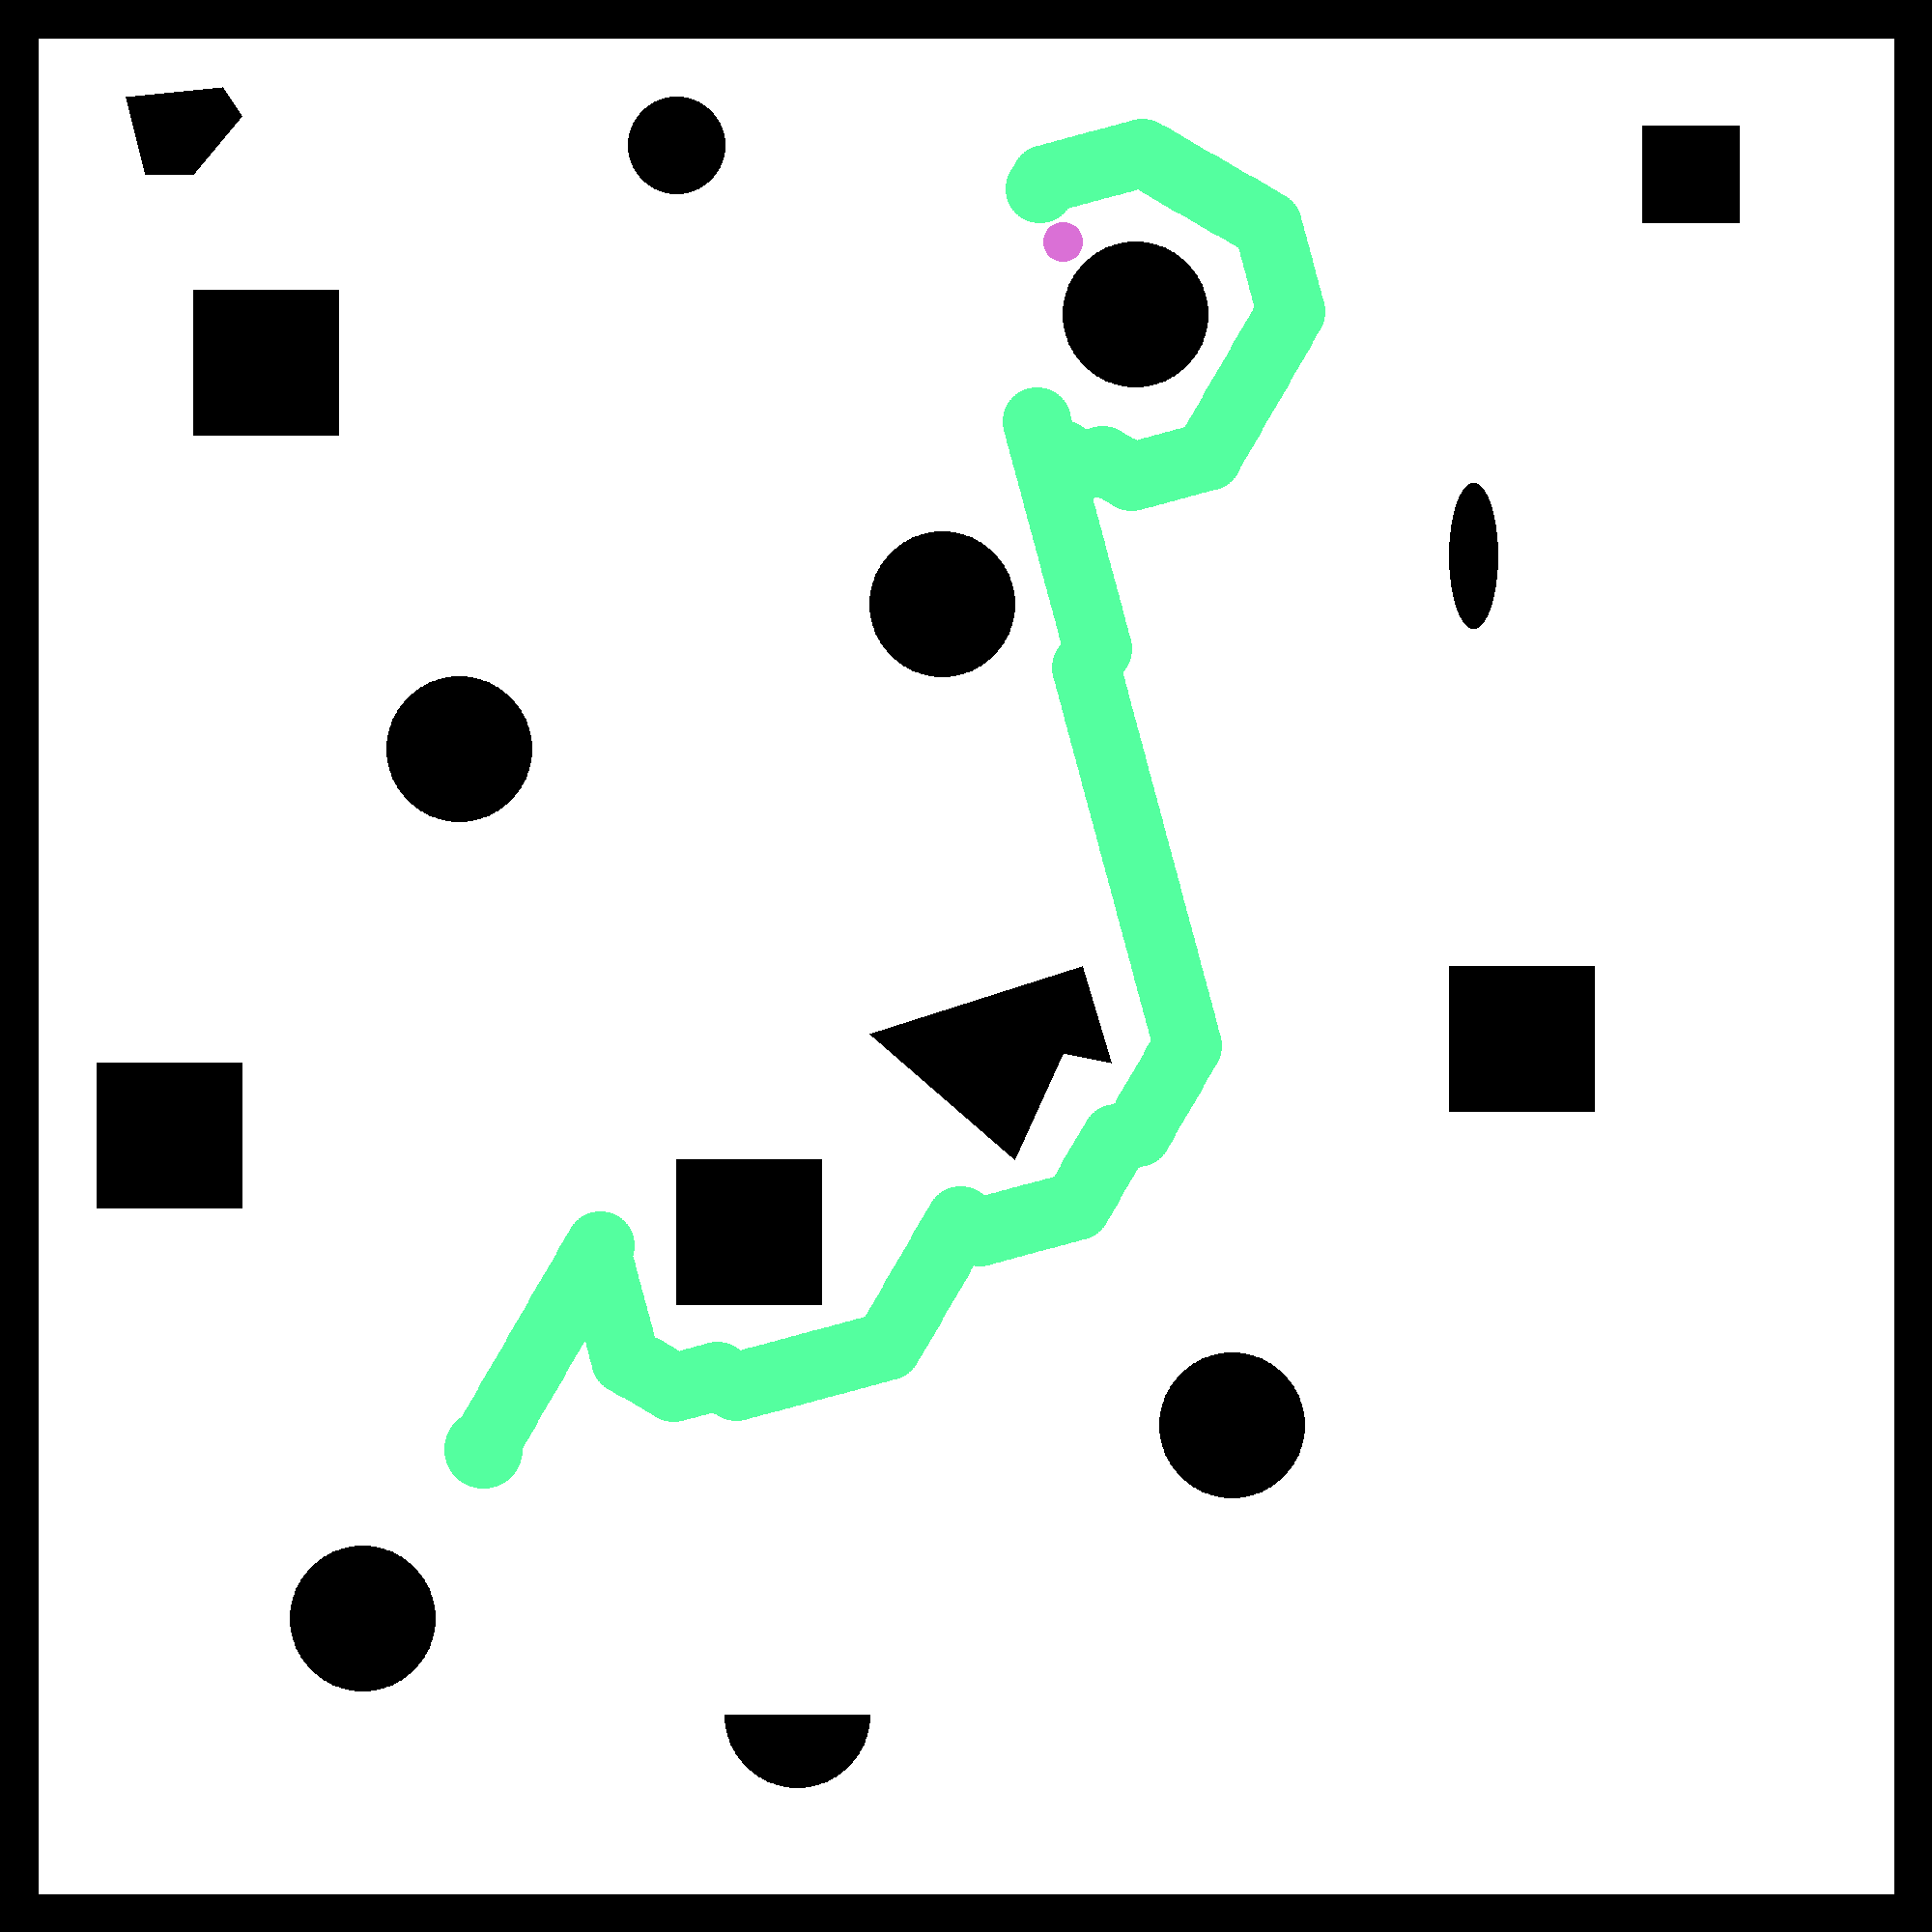

In [62]:
Movement_plot(1100,250,Vec_x,Vec_y)

In [63]:
len(range(2))

2